# Through Hole Dilutions with new optics

## Cuvette Holder 3D Design
This 3D design for the cuvette holder involved using a 2:1 ratio for the hole to channel ratio for the LED/AS7341 to the cuvette. The hole opening for both the LED and AS7341 is 5.0mm in diameter with a 10mm channel in length to the cuvette itself. This design positions the LED and AS7341 at a 90 degree angle from one another. There are two LED holes. One for the blue LED light and the other for the IR light. In this test the blue LED light is used for chlorophyll flourescence measurments. 

Design materials can be founnd at: https://github.com/jessiewynne/Chlorophyll-Fluorometer-/tree/main/Hardware/Cuvette%20Holder/Through%20Hole%20Designs


## Dilutions 
The AS7341 sensor underwent serial dilutions of rhomanine dye. These methods can be found at: 

After each individual dilution the cuvette was rinsed 3x with the next dulution vlaue before beign palced back into thr sensor to begin measurements. 
Dilutions were all completed for one minte for each dilution value at a gain of 128x. This was performed 3 times with integration times of 500, 700 and 1000ms. 
During these dilutions the AS7341 sensor was put under a cardborad box as to eliminate any ambient light interference. 

## LED placement 
The LED was secrured in the design using marine grade epoxy to eliminate any movement. 


# Dilution Results 
The following code was used to graph the dilution results for each trial. This code shows the results for the 128x gain at 700ms integration time. The other csv files and graphs can be found for other trials can be foiund at: https://github.com/jessiewynne/Chlorophyll-Fluorometer-/tree/main/Data%20Analysis/AS7341%20Dilution%20Tests/Through%20Hole%20Design%20with%202%3A1%20Ratio/LED%20with%20marine%20grade%20epoxy

# Code for Dilution Results

21.095833333333335
12.981608463455744
Mean for '0.0': 11.6429
Standard Deviation for '0.0': 0.4972
Mean for '0.25': 11.0000
Standard Deviation for '0.25': 0.0000
LoB: 12.4608
LoD: 12.4608
SD Low Concentration Sample: 0.0000


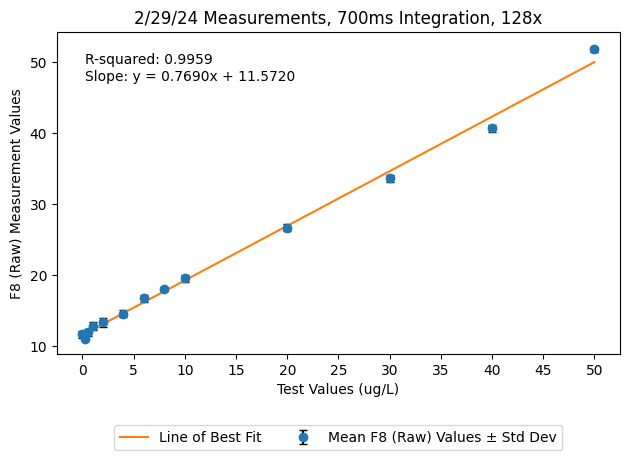

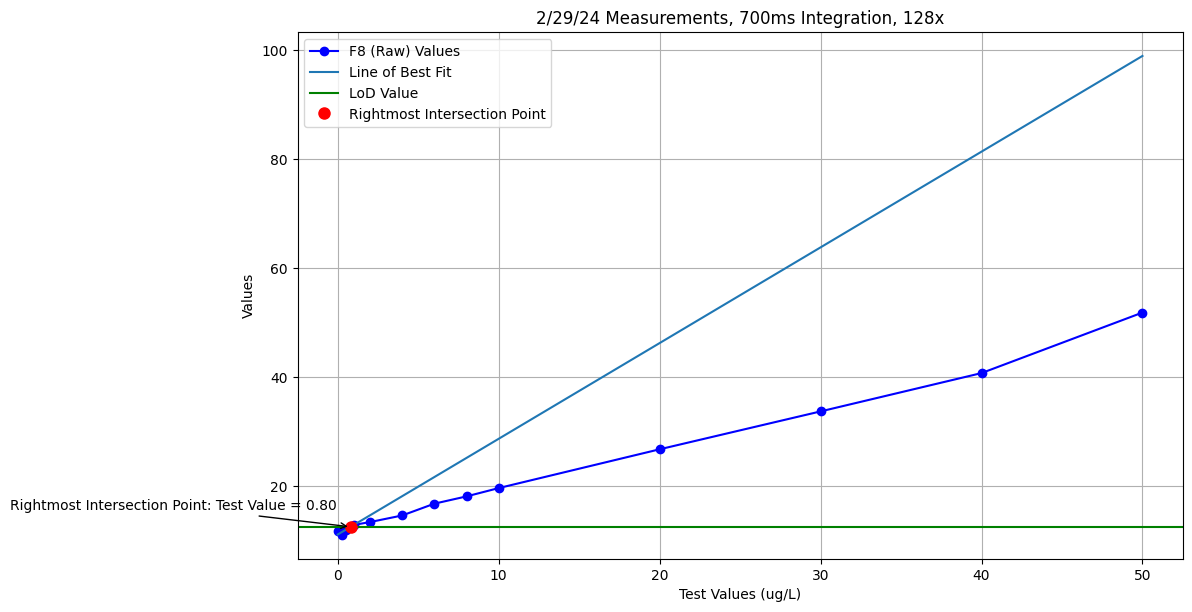

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress, t
from sklearn.metrics import r2_score, mean_squared_error

# Replace with the actual file path
file_path = "/Users/jessiewynne/chla_fluorometer/AS7341_Dilutions_2_1_ratio_Design/LED with marine epoxy/2_29_24_700ms_128x_alan_optics_1.csv"
# Read the CSV file without skipping any rows

df = pd.read_csv(file_path, encoding='utf-8')

# Filter out rows where the 'Test' column is 'test'
df = df[df['Test'].str.lower() != 'test'] 

# Convert 'F8 (Raw)' column to numeric values
df['F8 (Raw)'] = pd.to_numeric(df['F8 (Raw)'], errors='coerce')

# Get unique test categories (dilution values) in the order of appearance
categories = df['Test'].unique()

# Create a dictionary to store the 'F8 (Raw)' values for each category (dilution)
category_f8_raw_dict = {}

# Create dictionaries to store confidence intervals and ranges of uncertainty
confidence_intervals = {}
uncertainty_ranges = {}
lobs = {}  # To store LoB values
lods = {}  # To store LoD values

# Initialize mean_blank before the loop
mean_blank = 0.0

# Store unique x-values and their corresponding data points
x_values = []
y_values = []
std_devs = []

for category in categories:
    # Exclude the first data point from each category
    category_df = df[df['Test'] == category][1:]
    category_f8_raw_dict[category] = category_df['F8 (Raw)']

    # Calculate the mean and standard deviation for 'F8 (Raw)' data in each category
    category_f8_raw_mean = category_df['F8 (Raw)'].mean()
    category_f8_raw_std = category_df['F8 (Raw)'].std()
    # print(category_f8_raw_mean)

    # Calculate the sample size for each category
    category_sample_size = len(category_df['F8 (Raw)'])

    # Calculate the standard error for each category's mean
    category_standard_error = category_f8_raw_std / np.sqrt(category_sample_size)

    # Define the confidence level (e.g., 95%)
    confidence_level = 0.95

    # Calculate the margin of error using the t-distribution
    margin_of_error = t.ppf((1 + confidence_level) / 2, category_sample_size - 1) * category_standard_error

    # Calculate the confidence interval for each category's mean
    confidence_interval = (category_f8_raw_mean - margin_of_error, category_f8_raw_mean + margin_of_error)

    # Calculate the range of uncertainty (95% CI width) for each category
    uncertainty_range = confidence_interval[1] - confidence_interval[0]

    # Check if the 'Test' value can be converted to a float, otherwise, skip it
    try:
        x_value = float(category)
        x_values.append(x_value)
        y_values.append(category_f8_raw_mean)
        std_devs.append(category_f8_raw_std)
    except ValueError:
        pass

# Exclude the first data point from each trial
df_no_first = df.groupby('Test').apply(lambda group: group.iloc[1:])

# Calculate the mean and standard deviation for the entire dataset for 'F8 (Raw)' data
dataset_f8_raw_mean = df['F8 (Raw)'].mean()
dataset_f8_raw_std = df['F8 (Raw)'].std()
print(dataset_f8_raw_mean)
print(dataset_f8_raw_std)

# Calculate the sample size for the entire dataset
dataset_sample_size = len(df['F8 (Raw)'])

# Calculate the standard error for the entire dataset's mean
dataset_standard_error = dataset_f8_raw_std / np.sqrt(dataset_sample_size)

# Calculate the margin of error using the t-distribution
confidence_level = 0.95
margin_of_error = t.ppf((1 + confidence_level) / 2, dataset_sample_size - 1) * dataset_standard_error

# Calculate the confidence interval for the entire dataset's mean
confidence_interval = (dataset_f8_raw_mean - margin_of_error, dataset_f8_raw_mean + margin_of_error)

# Calculate the range of uncertainty (95% CI width) for the entire dataset
uncertainty_range = confidence_interval[1] - confidence_interval[0]

# Calculate the minimum and maximum 'F8 (Raw)' values for each test category
min_f8_values = {}
max_f8_values = {}
for category, f8_raw_values in category_f8_raw_dict.items():
    min_f8_values[category] = f8_raw_values.min()
    max_f8_values[category] = f8_raw_values.max()


# Scatter plot for mean F8 values with error bars and legend
plt.errorbar(x_values, y_values, yerr=std_devs, fmt='o', capsize=3, ecolor='black', label='Mean F8 (Raw) Values ± Std Dev')

# Calculate the line of best fit parameters (slope and intercept)
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Create a function to calculate predicted values using the line of best fit equation
def predict_values(x, slope, intercept):
    return slope * x + intercept

# Plot the line of best fit
plt.plot(x_values, predict_values(np.array(x_values), slope, intercept), label='Line of Best Fit')

# Calculate R-squared and RMSE
y_predicted = predict_values(np.array(x_values), slope, intercept)
r_squared = r2_score(y_values, y_predicted)
rmse = np.sqrt(mean_squared_error(y_values, y_predicted))

# Set x-axis tick positions at intervals of 5
plt.xticks(np.arange(min(x_values), max(x_values)+1, 5))

plt.xlabel('Test Values (ug/L)')
plt.ylabel('F8 (Raw) Measurement Values')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)  # Move legend down and adjust layout
# plt.title("AS7341 Dilutions 256x Gain, 700ms Integration")
plt.title("2/29/24 Measurements, 700ms Integration, 128x")

# Display R-squared, RMSE, slope, and y-intercept on the plot
plt.annotate(f'R-squared: {r_squared:.4f}\nSlope: y = {slope:.4f}x + {intercept:.4f}', xy=(0.05, 0.85), xycoords='axes fraction')

plt.tight_layout()



# Calculate mean and standard deviation for category '0.0' (blank) excluding the first measurement
category_0_0_df = df[df['Test'] == '0.0'][1:]
mean_blank = category_0_0_df['F8 (Raw)'].mean()
sd_blank = category_0_0_df['F8 (Raw)'].std()

# Print mean and standard deviation for '0.0' category
print(f"Mean for '0.0': {mean_blank:.4f}")
print(f"Standard Deviation for '0.0': {sd_blank:.4f}")

# Calculate LoB for category '0.0' excluding the first measurement
lob = mean_blank + 1.645 * sd_blank

# Calculate mean and standard deviation for category '0.25' (low concentration sample) excluding the first measurement
category_0_25_df = df[df['Test'] == '0.25'][1:]
sd_low_concentration_sample = category_0_25_df['F8 (Raw)'].std()

# Print mean and standard deviation for '0.25' category
print(f"Mean for '0.25': {category_0_25_df['F8 (Raw)'].mean():.4f}")
print(f"Standard Deviation for '0.25': {sd_low_concentration_sample:.4f}")

# Calculate LoD for category '0.25' excluding the first measurement
lod = lob + 1.645 * sd_low_concentration_sample

# Print LoB, LoD, and sd_low_concentration_sample values
print(f"LoB: {lob:.4f}")
print(f"LoD: {lod:.4f}")
print(f"SD Low Concentration Sample: {sd_low_concentration_sample:.4f}")


# Create a second figure for LoD values and F8 values vs. test categories
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed



# Plot F8 (Raw) values against test values (all categories)
plt.plot(x_values, y_values, marker='o', linestyle='-', color='blue', label='F8 (Raw) Values')

# Calculate the slope and intercept of the F8 values line
slope_f8_values = slope  # slope from the line of best fit
intercept_f8_values = intercept  # intercept from the line of best fit

# Assuming x_values contains your test values and lod is the singular LoD value

# List to store intersection points
intersection_points = []

# Initialize variables to track the rightmost LoD intersection point
max_intersection_x = float('-inf')
rightmost_intersection_point = None

# Calculate intersection points for the singular LoD value
for i in range(len(x_values) - 1):
    x1, x2 = x_values[i], x_values[i + 1]
    y1, y2 = y_values[i], y_values[i + 1]
    
    # Check if the LoD value is between the y-values of two adjacent x-values
    if min(y1, y2) <= lod <= max(y1, y2):
        slope = (y2 - y1) / (x2 - x1)
        intercept = y1 - slope * x1
        intersection_x = (lod - intercept) / slope

        # Update the rightmost intersection point
        if intersection_x > max_intersection_x:
            max_intersection_x = intersection_x
            rightmost_intersection_point = (intersection_x, lod)

# Plot F8 (Raw) values against test values
# plt.plot(x_values, y_values, marker='o', linestyle='-', color='blue', label='F8 (Raw) Values')
# Plot the line of best fit
plt.plot(x_values, np.array(x_values) * slope + intercept, label='Line of Best Fit')
# Plot LoD line and the rightmost intersection point
plt.axhline(y=lod, color='green', linestyle='-', label='LoD Value')
plt.plot([rightmost_intersection_point[0]], [rightmost_intersection_point[1]], marker='o', markersize=8, color='red', linestyle='None', label='Rightmost Intersection Point')

# Annotate the rightmost intersection point on the graph
plt.annotate(f'Rightmost Intersection Point: Test Value = {rightmost_intersection_point[0]:.2f}', 
             xy=rightmost_intersection_point, xycoords='data',
             xytext=(-10, 10), textcoords='offset points',
             arrowprops=dict(arrowstyle="->"),
             horizontalalignment='right', verticalalignment='bottom')

plt.xlabel('Test Values (ug/L)')
plt.ylabel('Values')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.title("2/29/24 Measurements, 700ms Integration, 128x")
plt.show()
